<a href="https://colab.research.google.com/github/AlejandroSenabre/Proyecto-Data-Science-CoderHouse/blob/main/cuarta_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización de la asignación de préstamos: analisis de la morosidad en el sector bancario

Alumno: Alejandro Senabre

## **Índice**   
1. [*Introducción*](#id1)  
2. [*Preview y carga del DataSet*](#id2)  
3. [*Lectura y transformación de los datos*](#id3)    
  3.1 [*Analisis de las variables*](#id4)    
  3.2 [*Limpieza y transformación de los datos*](#id5)  
4. [Gráficos](#id40)  
5. [Arboles de decisión](#id50)  
6. [Función predictora](#id3232323232323232)  
7. [Conclusión y próximos pasos](#id60)   

## 1. Introducción <a name="id1"></a>

Una de las funciones más importantes en un banco es su labor como prestamista de dinero, necesario para el crecimiento económico de un país al permitir a los usuarios hacerse de un monto de dinero en el apto que de otra forma le hubiera sido difícil o imposible de obtener, y esto es fundamental para mover la economía al ser habitualmente usado como método de financiación de diversos proyectos

Para un banco, hacer rentable el sistema de préstamos es fundamental para mantener su solvencia y continuar brindando servicios financieros a sus clientes. Esto implica que la banca debe financiarse con los intereses que cobra a sus clientes y tener un flujo de efectivo suficiente para poder seguir otorgando nuevos créditos y afrontar las pérdidas por morosidad. Este último es un factor clave que va a determinar la rentabilidad de un banco ya que es el mayor riesgo asociado con la concesión de préstamos. La morosidad puede ocurrir por múltiples causas, ya sea por no poseer los suficientes ingresos para afrontar el importe de las cuotas, tasas de intereses elevadas, monto total de la deuda excesivamente altos o por la simple falta de disposición para cumplir con los pagos.

En este proyecto, con la base de datos que tenemos disponible de diferentes características de los préstamos dados, se tratará de buscar qué variables puede llevar al prestatario a tener dificultades con la puntualidad de sus pagos e intentar dar una predicción certera a cada uno de los prestamos de convertirse en moroso.

Esta investigación puede ser una herramienta valiosa para ayudar a la banca a tomar decisiones sobre las posibles perdidas ocacionada por la falta de pagos de sus clientes y poder actuar ante ello.

**<font color='blue'>Contexto comercial:</font>** Una banca que necesite realizar una previsión de incobrabilidad.
  
  

**<font color='blue'>Objetivo:</font>** Encontrar una probabilidad de que un prestamo tenga dificultades en el pago de las cuotas.

## 2. Preview y carga del DataSet <a name="id2"></a>


El dataset fue obtenido a través de la página web de [*Kaggle*](https://www.kaggle.com/datasets/hemanthsai7/loandefault?select=train.csv), aparentemente fue creado para un Hackathon, estos son eventos para retar a programadores a sacar lo mejor de si, ofrecido por [*MachineHack*](https://machinehack.com/) que es una plataforma en línea para competencias expecializado en DataScience y Machine Learning.  

El origen de los datos no está especificado, por lo que no se sabe si es un dataset de un banco real o datos artificiales creados para este modelo, pero de todas formas nos van a resultar utiles para el analisis. 
 
Lo interesante de estos datos es que nos proporciona una columna llamada "*Loan Status*", la cual nos indica si el identificador correspondiente se encuentra al día con sus pagos. Esta columna toma como valor "0" para aquellos que no presentan morosidad, y un valor "1" que los define como deudores. Con esto se puede tener una mejor comprensión de cuales son las variables que tienen en común los deudores para separarlo de no deudores.
- **<font color='blue'>Archivo:</font>** loan.csv
- **<font color='blue'>Columnas:</font>** 35
- **<font color='blue'>Filas totales</font>** 67.463  

### 2.1 Carga de librerias y el Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy import stats
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


url_loa='https://raw.githubusercontent.com/AlejandroSenabre/Data-Coder/main/loans.csv'


loan=pd.read_csv(url_loa)

In [ ]:
loan2=loan.copy()

## 3. Lectura y transformación de los datos <a name="id3"></a>
Resumen de las celdas:
- Analizar las columnas categoricas y sus variables.
- Eliminación de columnas innecesarias para el analisis.
- Se transformaron las variables categoricas a numericas mediante diferentes metodos.


Lo primero que se hará es transformar las variables categoricas a variables numericas para poder manejarlas correctamente.

### 3.1 Analisis de las variables <a name="id4"></a>

#### 3.1.1 Resumen del dataset

Se mostrarán la información que contiene cada una de las columnas. Podemos observar que tenemos 35 columnas y que hay 9 que poseen información no numerica.  
Las principales columnas que observamos son:
- **<font color='green'>Loan Amount:</font>** Nos muestra el monton del prestamo.
- **<font color='green'>Term:</font>** La duración del prestamo. 
- **<font color='green'>Grade & Sub Grade: </font>** Riesgo que tiene el prestatario para el banco. "Grade" va de A hasta G, donde el ultimo grado es el que el banco considera menos confiable.
- **<font color='green'>Interest Rate: </font>** Tasa de interes del prestamo.
- **<font color='green'>Loan Status:</font>** Es la base de este trabajo, nos proporciona la información sobre si el prestamo se encuentra en mora (1) o está al dia con los pagos (0).

In [ ]:
pd.options.display.max_columns = None
loan.head(3)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

#### 3.1.2 Lectura de las variables categoricas

Se observa que algunos de estos datos se pueden facilmente aplicar algún metodo para transformar, mientras que otros tienen información que no nos será util y facilmente se pueden descartar.



In [ ]:
print(loan2.groupby('Employment Duration').agg({'Employment Duration' : 'count'}), '\n')
print('---------------- Payment plan ----------------')
print(loan2['Payment Plan'].value_counts(), '\n')
print('---------------- Loan Title ----------------')
print(loan2['Loan Title'].value_counts(), '\n')
print('---------------- Application Type ----------------')
print(loan2['Application Type'].value_counts(), '\n')
print('---------------- Verification Status ----------------')
print(loan2['Verification Status'].value_counts(), '\n')
print('---------------- Initial List Status ----------------')
print(loan2['Initial List Status'].value_counts(), '\n')

                     Employment Duration
Employment Duration                     
MORTGAGE                           36351
OWN                                 6962
RENT                               24150 

---------------- Payment plan ----------------
n    67463
Name: Payment Plan, dtype: int64 

---------------- Loan Title ----------------
Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64 

---------------- Application Type ----------------
INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64 

---------------- Verification Status ----------------
Source Verified    33036
Verified           18078
Not Verified

### 3.2 Limpieza y transformación de los datos <a name="id5"></a>

En esta sección se transformaran las variables categoricas a variables numericas para poder manejar mejor el dataset a raiz de las futuras predicciones. Ademas se eliminaran las columnas que no nos den mucha información o que puedan perjudicar en el analisis.

#### 3.2.1 Reducción de datos 
**Las columnas eliminadas son las siguientes:**  
- <font color='lightblue'>**ID:**</font> Es un codigo de verificación para cada prestamo. No sirve a la hora de hacer predicciones.
- <font color='lightblue'>**Loan Title:**</font> El motivo expresado del prestamo. Son demasiadas variables, en especifico 109 variables distintas, que se complica a la hora de agruparlas en menos categorias.
- <font color='lightblue'>**Initial List Status:**</font> Es el estado de lista inicial. Se divide en "Esperando" y "Reenviado". No tiene repercusión en el analisis.
- <font color='lightblue'>**Batch Enrolled:**</font> Numero de inscripcion del lote. Mismo motivo que la eliminación de "ID".
- <font color='lightblue'>**Verification Status:**</font> No tiene repercusión en el analisis.
- <font color='lightblue'>**Payment Plan:**</font> No tiene repercusión en el analisis.

In [ ]:
loan2.drop(columns = ['ID', 'Loan Title', 'Initial List Status', 'Batch Enrolled','Verification Status', 'Payment Plan'], inplace = True)

#### 3.2.2 Aplicando OneHotEncoder

Se aplicará a las columnas "Employment Duration" y "Application Type", la primera al tener 3 variables distintas, lo que se hizo fue crear 3 columnas distintas para cada una de las variables y rellenar con "1" y "0" dependiende de cual de esa 3 caracteristica tiene el prestamo. Mientras que con la ultima columna solo hacia referencia a si el prestamo era individual o en conjunto, por lo que se decidio reemplazar por "1" los individuales, y dejar los que no con "0".

In [ ]:
ohe = OneHotEncoder()
ohe.fit(loan2[['Employment Duration']])
ohe_result = ohe.transform(loan2[['Employment Duration']]).toarray()
ohe_df = pd.DataFrame(ohe_result, columns=ohe.get_feature_names_out(['Employment Duration']))

# Concatenamos el dataframe original con el dataframe de variables binarias
loan2 = pd.concat([loan2, ohe_df], axis=1)
# Eliminamos la columna original
loan2 = loan2.drop('Employment Duration', axis=1)

In [ ]:
## Transformamos los resultados "float" a "int" para quitar los decimales. Queda mas lindo :)
loan2['Employment Duration_MORTGAGE']=loan2['Employment Duration_MORTGAGE'].astype(int)
loan2['Employment Duration_OWN']=loan2['Employment Duration_OWN'].astype(int)
loan2['Employment Duration_RENT']=loan2['Employment Duration_RENT'].astype(int)


In [ ]:
loan2['Application Type'] = loan2['Application Type'].replace({'INDIVIDUAL': 1, 'JOINT':0})

#### Aplicamos LabelEncoder para transformar "Grade" y "Sub Grade"

Transformamos manualmente los valores de "Grade". Ya que son datos ordinales, es decir, que podemos asignar un orden a cada uno, podemos poner un numero a cada uno de estos, que iran del "1" al "7".
Para "Sub Grade" haremos lo mismo, pero aplicamos una función de ScikitLearn ya que son "36" para hacerlo manualmente.

In [ ]:
loan2['Grade'] = loan2['Grade'].replace({'A': 1, 'B': 2, 'C':3 , 'D':4 , 'E':5, 'F':6 , 'G':7})

Transformamos Sub Grade con ScikitLearn 

In [ ]:
loan2 = loan2.sort_values('Sub Grade')   ## Ordenamos los datos por "Sub Grade"
loan2['Sub Grade'] = LabelEncoder().fit_transform(loan2['Sub Grade']) + 1   #Sumo 1 para que no arranque con 0.
loan2 = loan2.sort_index()                            # Volvemos a ordenarlo por el indice
# loan2.head()   #Vemos si funcionó correctamente

---

### 3.3 Resultado de la transformación <a name="id6"></a>

Visualizamos el DF original vs el DF transformado.

In [ ]:
pd.options.display.max_columns = None #Para ver todas las columnas completas sin limites
loan.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
loan2.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Employment Duration_MORTGAGE,Employment Duration_OWN,Employment Duration_RENT
0,10000,32236,12329.36286,59,11.135007,2,14,176346.62670,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,1,49,0,31,311301,6619,0,1,0,0
1,3609,11940,12191.99692,59,12.237563,3,18,39833.92100,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,1,109,0,53,182610,20885,0,0,0,1
2,28276,9311,21603.22455,59,12.545884,6,19,91506.69105,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,1,66,0,34,89801,26155,0,1,0,0
3,11170,6954,17877.15585,59,16.731201,3,13,108286.57590,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,1,39,0,40,9189,60214,0,1,0,0
4,16890,13226,13539.92667,59,15.008300,3,19,44234.82545,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,1,18,0,430,126029,22579,0,1,0,0


### Creación de la función que nos haga todo lo anterior



In [ ]:
def preprocesar_datos(df):
    # Eliminamos columnas que no se utilizarán en el modelo
    df.drop(columns=['ID', 'Loan Title', 'Initial List Status', 'Batch Enrolled',
                      'Verification Status', 'Payment Plan'], inplace=True)
    
    # Convertimos la variable 'Employment Duration' a variables binarias utilizando OneHotEncoder
    ohe = OneHotEncoder()
    ohe.fit(df[['Employment Duration']])
    ohe_result = ohe.transform(df[['Employment Duration']]).toarray()
    ohe_df = pd.DataFrame(ohe_result, columns=ohe.get_feature_names_out(['Employment Duration']))
    
    # Concatenamos el dataframe original con el dataframe de variables binarias
    df = pd.concat([df, ohe_df], axis=1)
    
    # Eliminamos la columna original
    df = df.drop('Employment Duration', axis=1)
    
    # Transformamos los resultados "float" a "int" para quitar los decimales
    df['Employment Duration_MORTGAGE'] = df['Employment Duration_MORTGAGE'].astype(int)
    df['Employment Duration_OWN'] = df['Employment Duration_OWN'].astype(int)
    df['Employment Duration_RENT'] = df['Employment Duration_RENT'].astype(int)
    
    # Convertimos la variable 'Application Type' a valores numéricos (1 para 'INDIVIDUAL' y 0 para 'JOINT')
    df['Application Type'] = df['Application Type'].replace({'INDIVIDUAL': 1, 'JOINT': 0})
    
    # Convertimos la variable 'Grade' a valores numéricos (1 para 'A', 2 para 'B', etc.)
    df['Grade'] = df['Grade'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
    
    # Ordenamos los datos por 'Sub Grade'
    df = df.sort_values('Sub Grade')
    
    # Convertimos la variable 'Sub Grade' a valores numéricos
    df['Sub Grade'] = LabelEncoder().fit_transform(df['Sub Grade']) + 1
    
    return df

## 4. Graficos <a name="id40"></a>


A diferencia de la anterior entrega, ahora se agregaron las nuevas variables numericas al analisis. Tambien se tomará una muestra del 2% del total del dataframe para no tenemos tantos datos apilados que dificulten la visibilidad de los datos.

Los siguientes gráficos solamente nos servirán para darnos una idea general del dataset y ver si hay una influencia entre una de las variables con el estado de "deudor"

In [ ]:
muestra_loan2 = loan2.sample(frac=0.02)  #Toma una muestra del 2% del total del dataframe
muestra_loan2.info()

<Figure size 720x720 with 0 Axes>

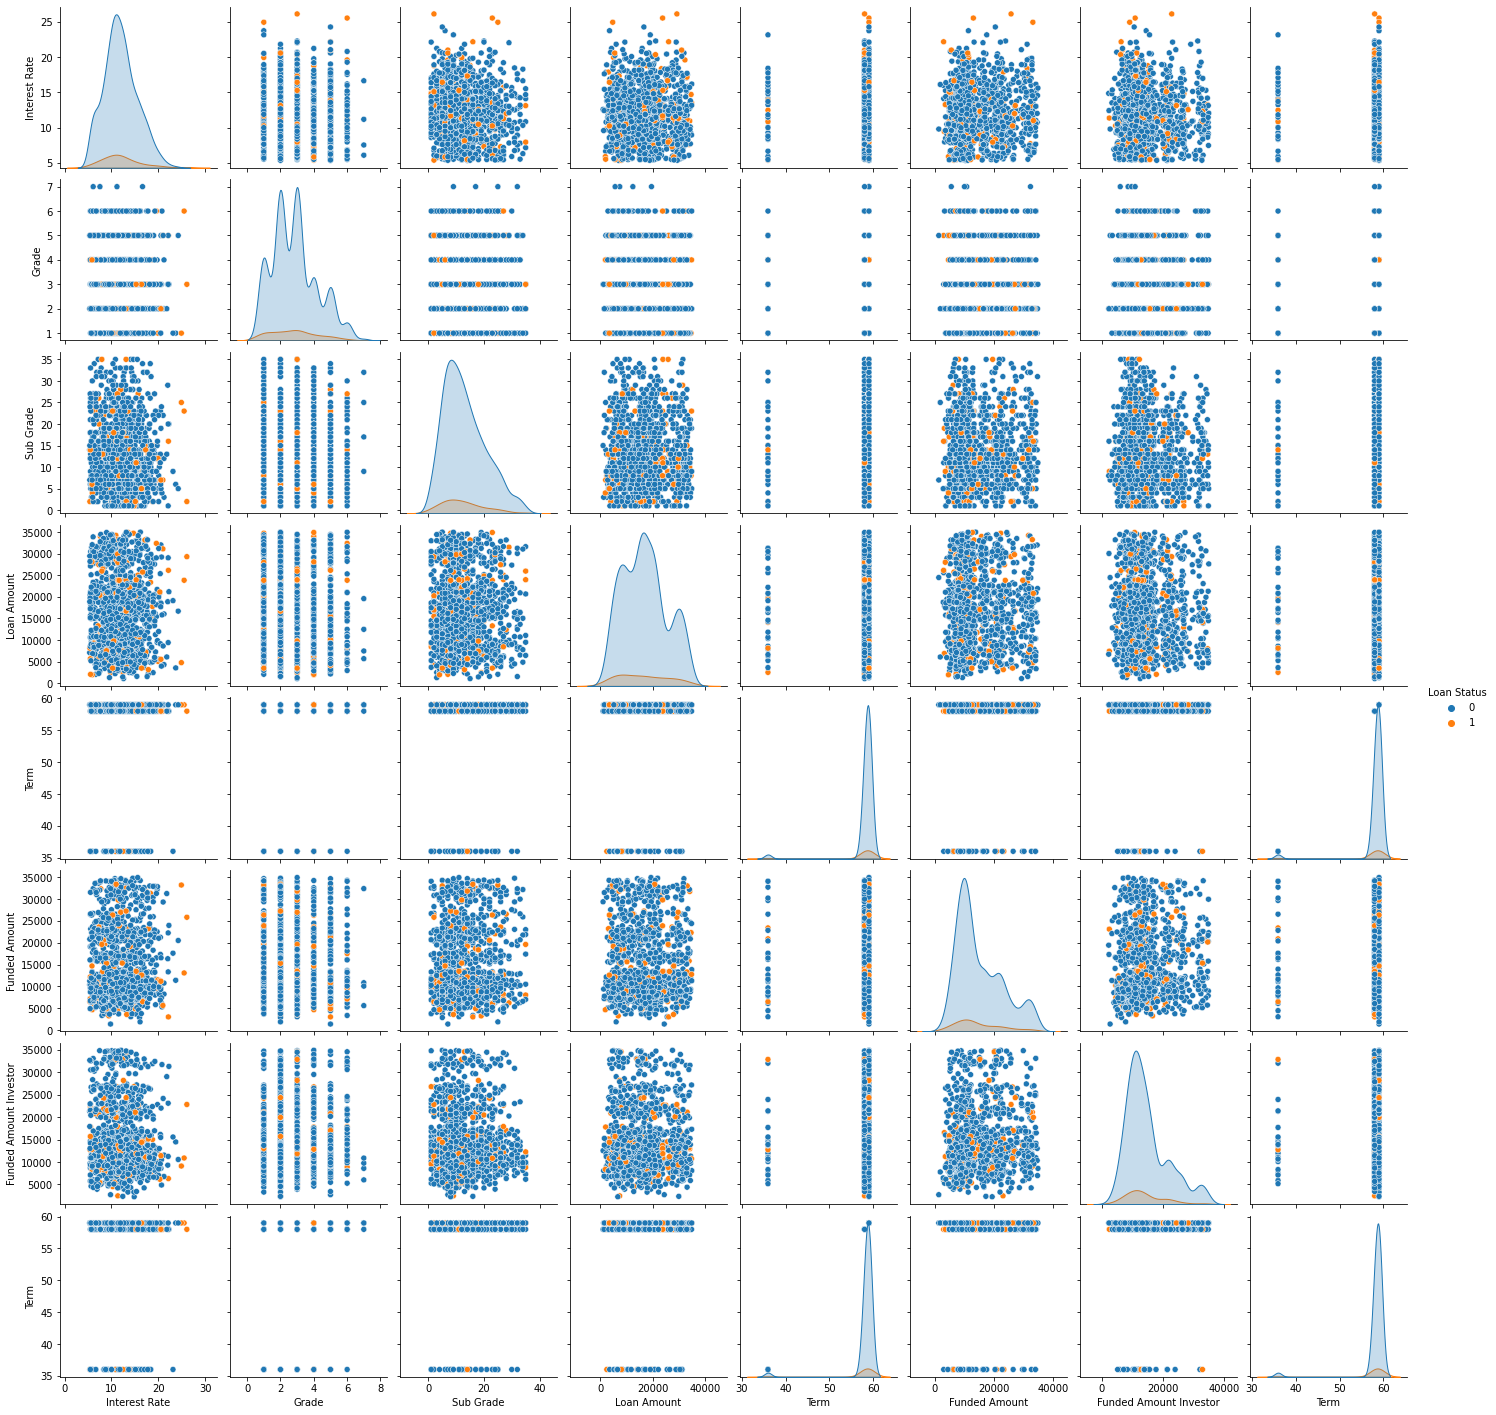

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.pairplot(muestra_loan2, vars=['Interest Rate','Grade','Sub Grade','Loan Amount','Term','Funded Amount','Funded Amount Investor','Term'], hue="Loan Status")
plt.show()

### Graficos mas utiles

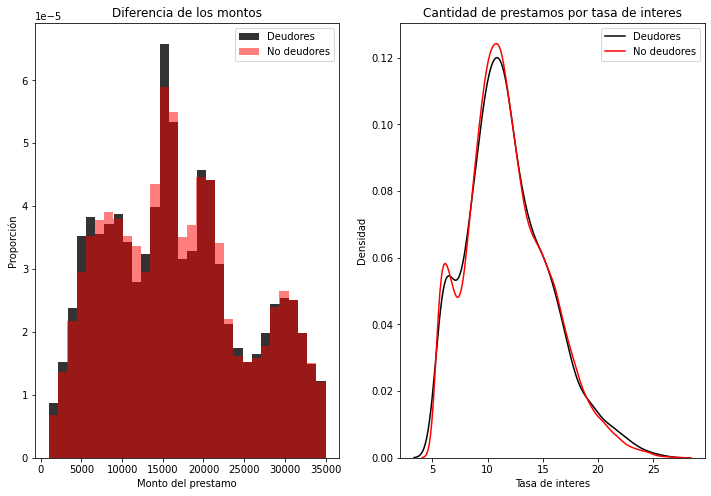

In [ ]:
deudores = loan.loc[loan['Loan Status']>0]
no_deudores = loan.loc[loan['Loan Status']==0]
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Graficar el primer histograma
axs[0].hist(deudores['Loan Amount'], 
            cumulative=False,  
            density=True,
            alpha=0.8,
            bins=30,
            label='Deudores',
            color='black')
axs[0].hist(no_deudores['Loan Amount'], 
            cumulative=False,  
            density=True,
            alpha=0.5,                 
            bins=30,
            label='No deudores',     
            color='red')
axs[0].set_title('Diferencia de los montos')
axs[0].set_ylabel('Proporción')
axs[0].set_xlabel('Monto del prestamo')
axs[0].legend()

# Graficar el segundo KDE
sns.kdeplot(data=deudores, shade=False, x="Interest Rate", color='Black', label='Deudores', ax=axs[1])
sns.kdeplot(data=no_deudores, shade=False, x="Interest Rate", color='red', label='No deudores', ax=axs[1])
axs[1].set_xlabel("Tasa de interes")
axs[1].set_ylabel("Densidad")
axs[1].set_title("Cantidad de prestamos por tasa de interes")
axs[1].legend()

# Mostrar la figura
plt.show()

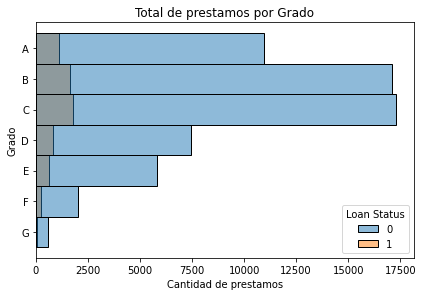

In [ ]:
sns.histplot(data=loan.sort_values('Grade'), y = "Grade", color='purple', hue='Loan Status')
plt.tight_layout()  
plt.xlabel("Cantidad de prestamos")
plt.ylabel("Grado")
plt.title("Total de prestamos por Grado")
plt.show()

## 5. Arboles de decisión <a name="id50"></a>

Los árboles de decisión son un método popular en el campo de la ciencia de datos para la clasificación y predicción.

En términos simples, un árbol de decisión es una estructura de datos en forma de árbol que se utiliza para tomar decisiones en función de una serie de condiciones. En el contexto de los préstamos bancarios, un árbol de decisión podría utilizarse para predecir si un préstamo se convertirá en deudor o no en función de una serie de características del prestamo.

El árbol de decisión comienza con un nodo raíz que representa la pregunta que divide la mayor cantidad de datos (por ejemplo, "¿El monto del prestamos ?"). A partir de ahí, el árbol se ramifica en varios nodos, cada uno representando otra posible pregunta "¿El monto del prestamo es superior a $10.000?", "¿La tasa de interes es superior al 12%?", etc. Todo esto para llegar a la conclusión final, que sumado todas las caracteristicas anteriores, da como resultado mayor probabilidad de que sea moroso o no.

### Carga de datos

Preparamos los datos e importamos las galerias necesarias para podes aplicar este metodo.

In [ ]:
#------ Creamos un nuevo DF para no modificar el original.
loan4=loan2.copy()  

In [ ]:
from sklearn.tree import DecisionTreeClassifier     #Libreria princial
from sklearn.tree import plot_tree                  #Sirve para la hora de graficar el arbol.
y = loan4['Loan Status']                            #Creamos la variable que contiene la columna de los morosos.
X = loan4.drop('Loan Status', axis=1)               #El DF sin la variable a predecir.

### Aplicando arboles de decisión

Se trato de elegir una profundidad no tan alta para que no haga un sobreajuste y luego no sea capaz de predecir mas allá de los datos con lo que fue entrenado, pero tampoco muy baja ya que, con la cantidad de columnas y categorias que tiene el dataframe, podria no capturar la complejidad de los datos y bajar su rendimiento predictivo.

In [ ]:
from sklearn.model_selection import train_test_split     # Libreria para dividir los datos en "test" y "train"
from sklearn.metrics import accuracy_score               # Mide la precisión del modelo.

#------ Dividimos los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size=0.3,     
                                                    random_state=33)

#------ Crear un modelo de árbol de decisión y entrenarlo en el conjunto de entrenamiento
tree = DecisionTreeClassifier(max_depth=21,              # Profundidad del arbol
                              random_state=33)           # Semilla 33
tree.fit(X_train, y_train)

#------ Predecir las etiquetas del conjunto de prueba
y_pred = tree.predict(X_test)

### Grafico del arbol

No es necesario realizarlo, pero nos puede ayudar a ver visualmente como un arbol de decisión funciona, con la profundidad que le insertamos previamente.

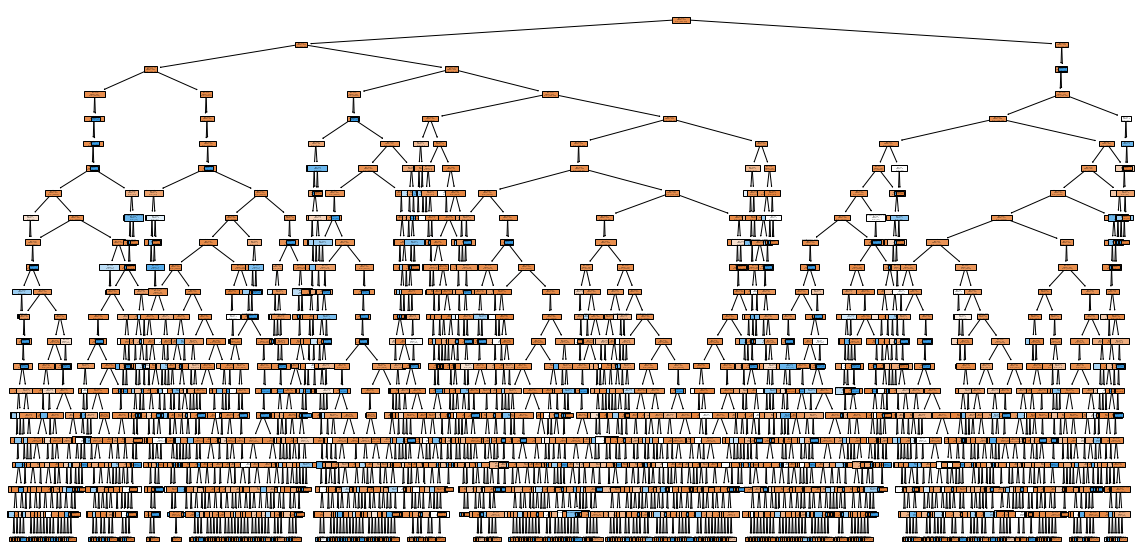

In [ ]:
#------- Creamos el gráfico del árbol
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns)
plt.show()

### Evaluación de la efectividad del modelo

Tenemos una precisión del modelo del 87.32%, puede ser sospechosamente muy alta ya que en nuestros datos, solamente el 9% son deudores, por lo que si nuestro modelo solamente predice que todos pagan sus cuotas correctamente, nos da una precisión del 91%.

In [ ]:
#------ Evaluamos la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy*100))

Precisión del modelo: 87.32%


Con la Matriz de Confusión se ve que nuestro modelo predijo muy poca cantidad de deudores, para el uso que le estamos dando (ver apartado siguiente) no es muy problematico este hecho ya que estamos en busqueda del porcentaje, no efectivamente si es uno u otro, pero igualmente es algo que se debe corregir para futuras entregas.

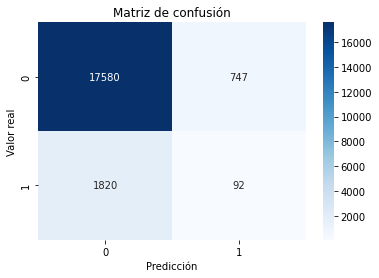

In [ ]:
from sklearn.metrics import confusion_matrix

#------ Crear una matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
#------ Crear un heatmap de la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

---

Uso de probabilidades, se usará para la creación de la función.

In [ ]:
from sklearn import metrics
# Predecir las probabilidades del conjunto de prueba
y_pred_prob = tree.predict_proba(X_test)

# Obtener la probabilidad de la clase positiva (1)
y_pred_prob_1 = y_pred_prob[:, 1]
y_pred_prob

array([[0.92509363, 0.07490637],
       [0.9066199 , 0.0933801 ],
       [0.        , 1.        ],
       ...,
       [0.9016984 , 0.0983016 ],
       [0.94524669, 0.05475331],
       [1.        , 0.        ]])

In [ ]:
# Predecir las probabilidades del conjunto de prueba
y_pred_prob = tree.predict_proba(X_test)

# Obtener la probabilidad de la clase positiva (1)
y_pred_prob_1 = y_pred_prob[:, 1]
len(y_pred)

20239

## 6. Función predictora <a name="id3232323232323232"></a>

A continuación vamos a poner en uso el arbol de decisión que habiamos creado previamente para que nos calcule las probabilidades que tiene un cliente en convertirse en deudor. Esta funcionalidad resulta importante ya que puede ser usada por un usuario final que no tenga conocimiento de programación de una forma sencilla.

### Creación de la función

In [ ]:
#------- Ordeno la columna para que "Loan Status" se situe al final
columna_extraida = loan2['Loan Status']
loan2 = loan2.drop('Loan Status', axis=1)
loan2 = pd.concat([loan2, columna_extraida], axis=1)
#------- Se crea una copia sin esta columna para usar el modelo predictivo
loan23=loan2.copy()
loan23=loan23.drop('Loan Status', axis=1)
#------- Si, otra copia
loan2321=loan.copy()
#------- Unimos el DF original y le agregamos una columna que muestra el porcentaje de convertirse en Deudor
predicciones_nuevo = tree.predict_proba(loan23)
prob_1_nuevo_23 = predicciones_nuevo[:, 1]
df_prob_1 = pd.DataFrame(prob_1_nuevo_23, columns=["Probabilidad 1"])
df_nuevo_con_prob = pd.concat([loan2321, df_prob_1], axis=1)

In [ ]:
def buscar_probabilidad(df):
    ###
    #-------- Busca un valor en la columna "ID" del DataFrame y devuelve el valor
    #-------- correspondiente de la columna "Probabilidad 1".
    ###
    while True:
        try:
            id_busqueda = int(input("Ingrese el valor del ID a buscar: "))
            resultado = df.loc[df['ID'] == id_busqueda, 'Probabilidad 1'].values[0]
            if resultado == 1:
                print("El ID proporcionado actualmente está registrado como MOROSO")
            return resultado
        except (IndexError, ValueError):
            print("Por favor ingrese un ID válido.")

### Funcionamiento

Se debe correr la siguiente celd. Para verificar el funcionamiento podemos insertarle los siguientes ID
- 9038338	: Deudor.
- 48337307 : No deudor
- 37017086 : No deudor con probabilidad muy baja.

In [ ]:
# Buscar la probabilidad correspondiente a un ID
probabilidad_busqueda = buscar_probabilidad(df_nuevo_con_prob)
print("Este ID tiene",round(probabilidad_busqueda*100,4),'%','de probabilidad de convertirse en moroso')          # Imprime el resultado de la búsqueda

Ingrese el valor del ID a buscar: 9038338	
El ID proporcionado actualmente está registrado como MOROSO
Este ID tiene 100.0 % de probabilidad de convertirse en moroso


Esta función nos crea el siguiente panel donde debemos ingresar un ID de un cliente. El resultado proporcionado será un porcentaje que tenga el ID en no estar al dia con los pagos.  

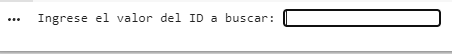  

Si le proporcionamos un ID invalido no nos dejará continuar.


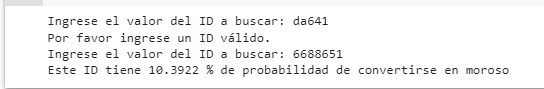  

Como ultimo si le propocionamos un ID que actualmente es deudor, tendremos el siguiente mensaje  

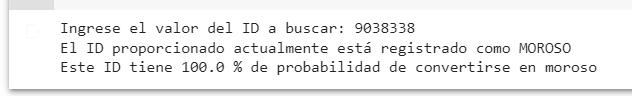

## 7. Conclusiones y proximas entregas <a name="id60"></a>

Luego de un análisis exploratorio de los datos bancarios de préstamos, se pudo observar que no existe una variable en particular que tenga un impacto mayoritario en la agrupación de los deudores. Debido a esta falta de evidencia visual, se procedió a implementar técnicas de Machine Learning con el objetivo de predecir si un préstamo se convertirá en deudor o no. En particular, se aplicaron modelos de árboles de decisión, los cuales permitieron obtener una probabilidad de predicción para cada préstamo.

**Próximos pasos:**
- Crear mas y mejores metricas de predicción para ver y analizar la efectividad del arbol de decisión.
- Explicar el funcionamiento de cada metrica empleada.
- Crear un visualizador mas eficiente para buscar la probabilidad de ser moroso por ID u otra variable